In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1 ]

for feature in feature_with_na :
    print("Feature {} has {} % missing values".format(feature,np.round(df[feature].isnull().mean()*100,4)))

Feature LotFrontage has 17.7397 % missing values
Feature Alley has 93.7671 % missing values
Feature MasVnrType has 0.5479 % missing values
Feature MasVnrArea has 0.5479 % missing values
Feature BsmtQual has 2.5342 % missing values
Feature BsmtCond has 2.5342 % missing values
Feature BsmtExposure has 2.6027 % missing values
Feature BsmtFinType1 has 2.5342 % missing values
Feature BsmtFinType2 has 2.6027 % missing values
Feature FireplaceQu has 47.2603 % missing values
Feature GarageType has 5.5479 % missing values
Feature GarageYrBlt has 5.5479 % missing values
Feature GarageFinish has 5.5479 % missing values
Feature GarageQual has 5.5479 % missing values
Feature GarageCond has 5.5479 % missing values
Feature PoolQC has 99.5205 % missing values
Feature Fence has 80.7534 % missing values
Feature MiscFeature has 96.3014 % missing values


<AxesSubplot:>

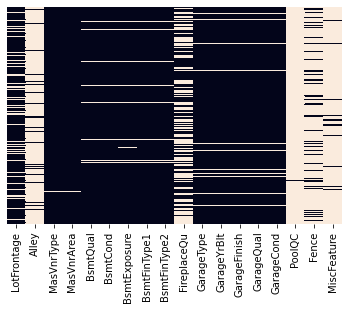

In [5]:
sns.heatmap(df[feature_with_na].isnull(),yticklabels=False,cbar=False)

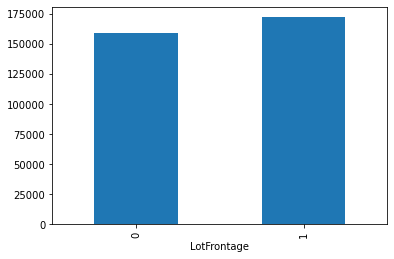

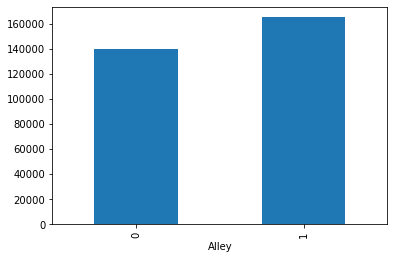

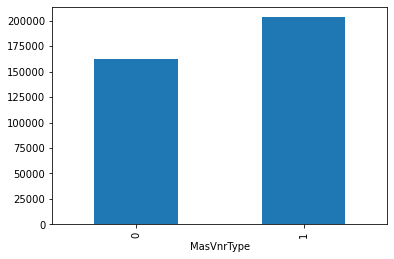

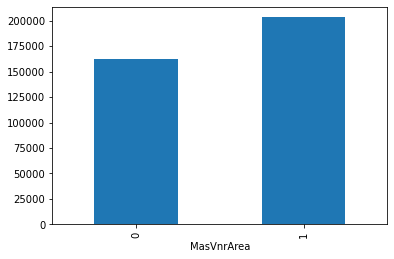

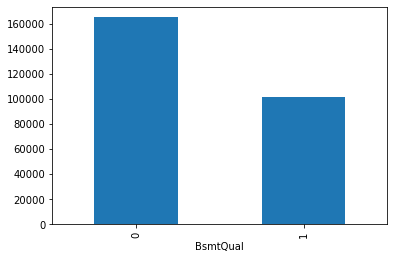

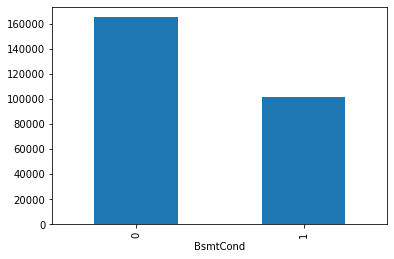

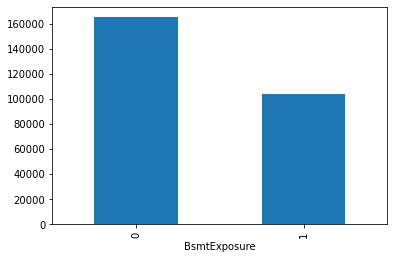

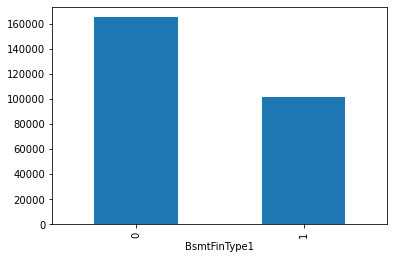

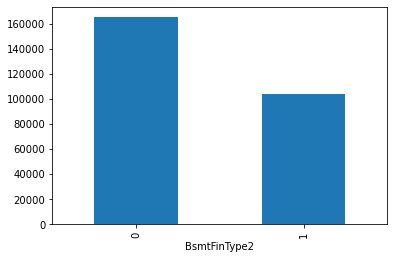

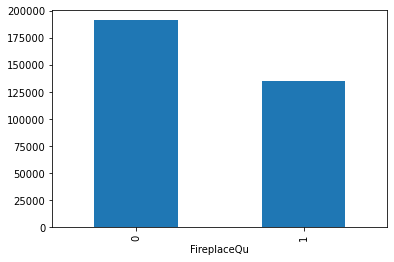

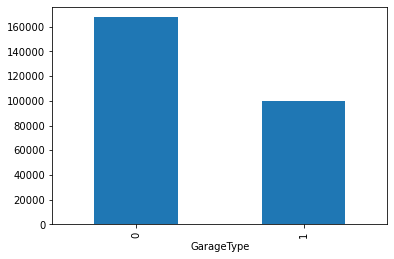

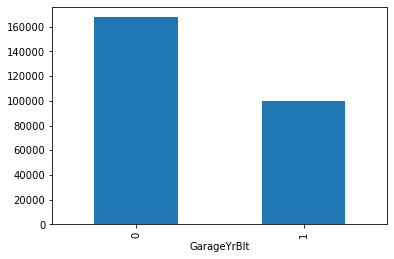

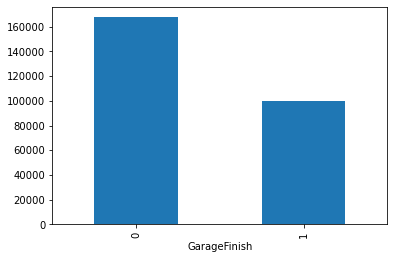

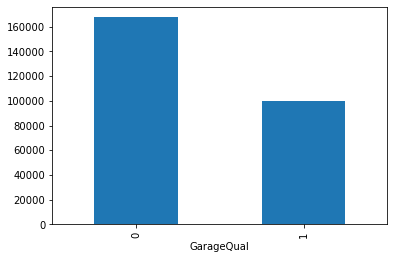

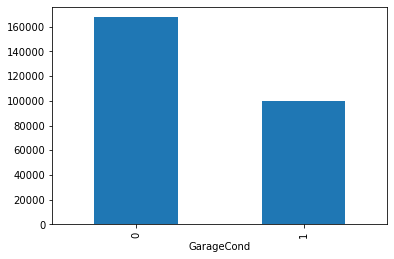

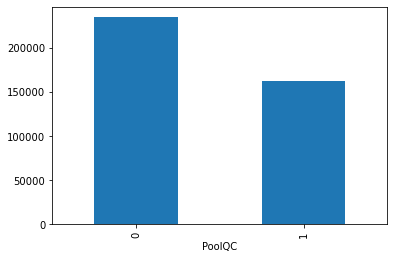

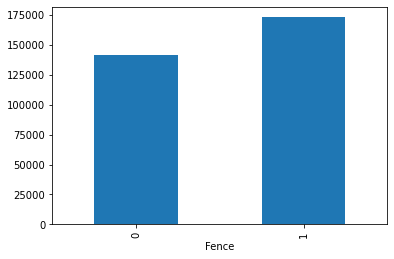

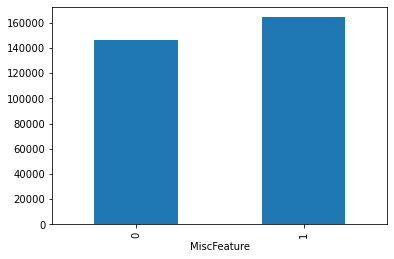

In [6]:
df_copy = df.copy()
for feature in feature_with_na :
    df_copy[feature] = np.where(df_copy[feature].isnull(),1,0)
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    #sns.barplot(data=df_copy,x=df_copy.groupby(feature)['SalePrice'].median(),y='SalePrice')
    plt.show()

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Total numerical_feature are  : ",len(numerical_feature))

Total numerical_feature are  :  38


In [8]:
df[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature ]
df[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


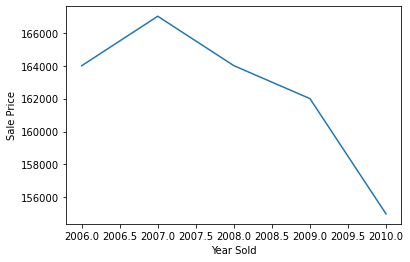

In [10]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

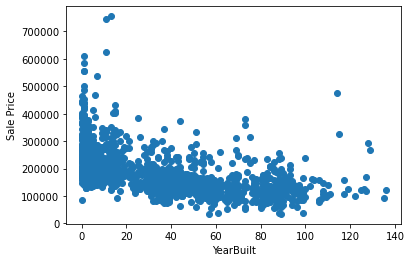

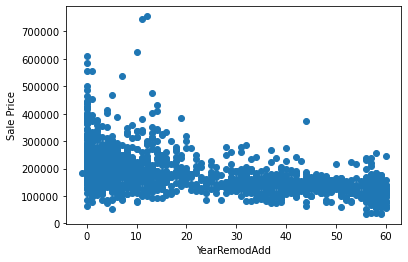

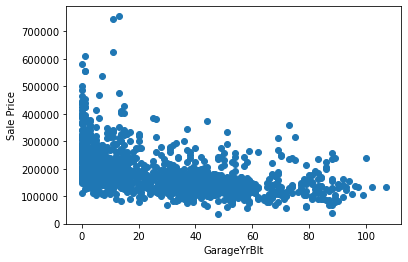

In [11]:
for feature in year_feature :
    if feature != 'YrSold' :
        a={}
        #df_copy = df.copy()
        #df_copy[feature] = df_copy['YrSold']-df_copy[feature]
        a[feature] = df['YrSold']-df[feature]
        plt.scatter(a[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

In [12]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25 and feature not in year_feature+['Id']]
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


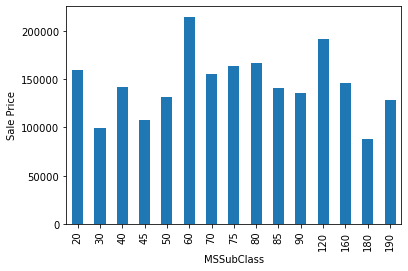

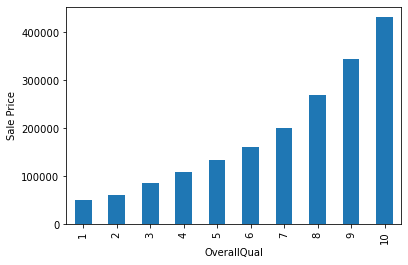

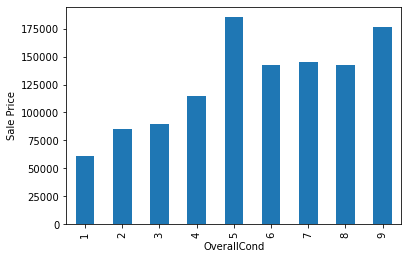

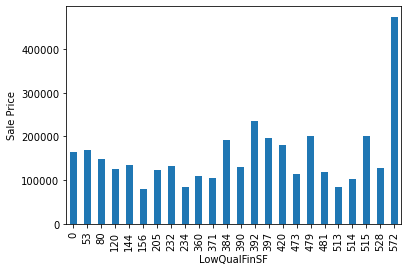

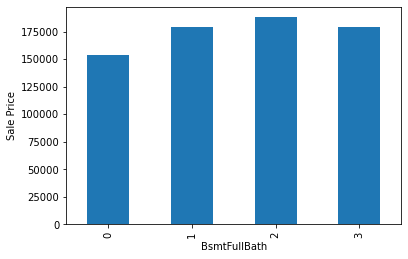

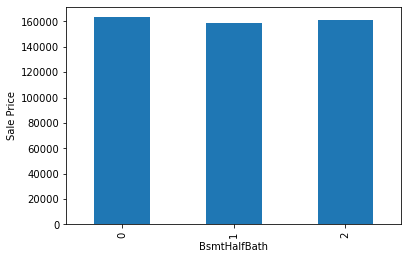

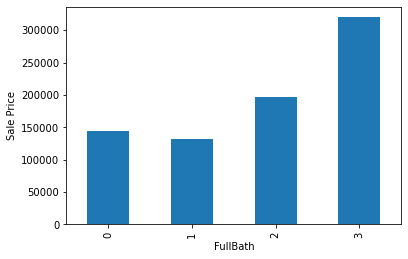

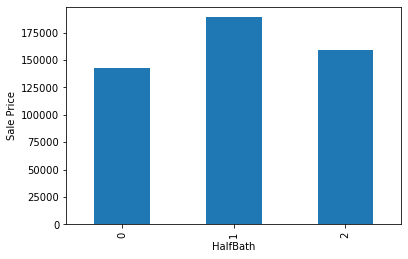

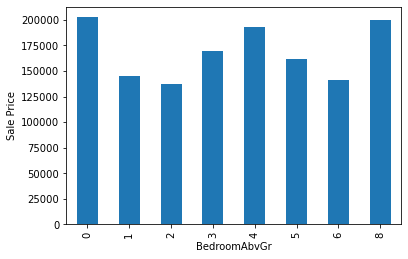

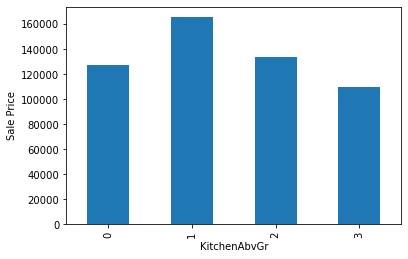

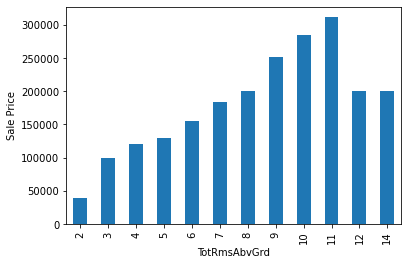

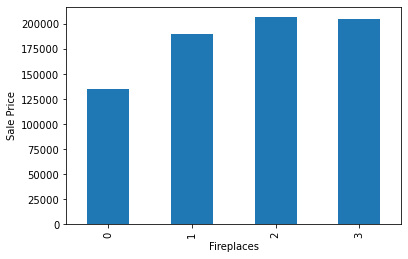

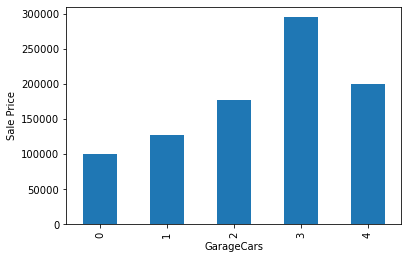

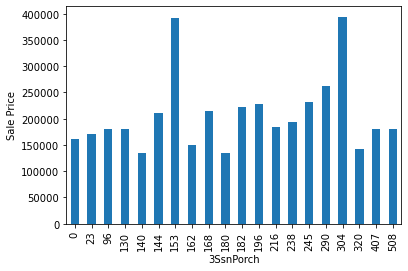

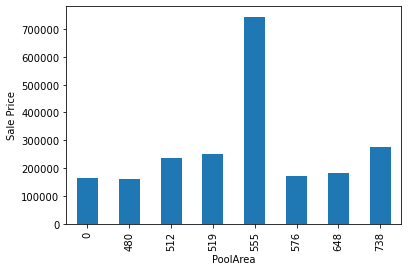

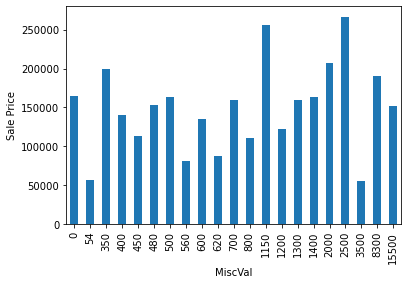

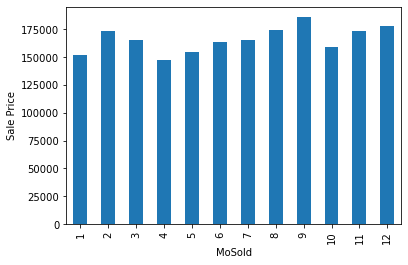

In [13]:
for feature in discrete_feature :
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

In [14]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


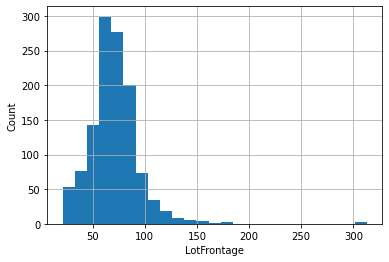

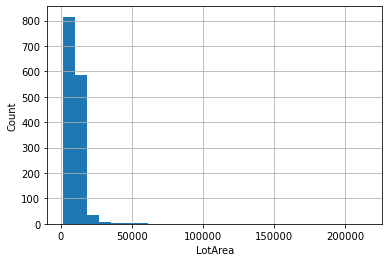

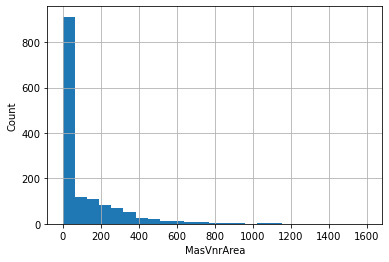

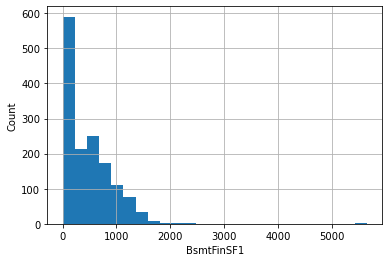

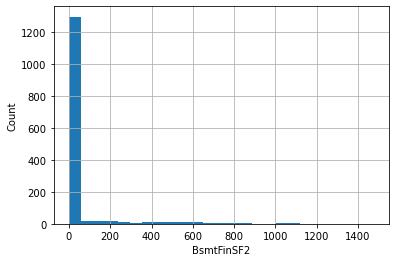

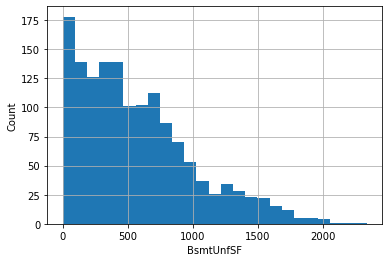

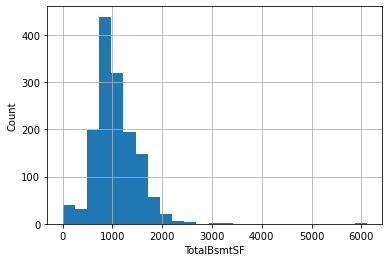

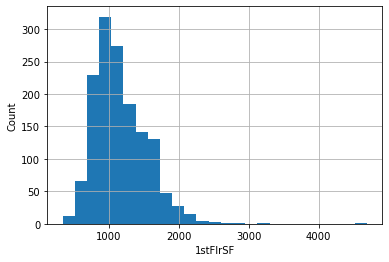

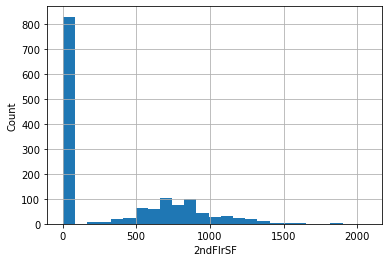

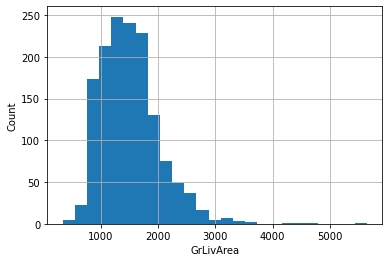

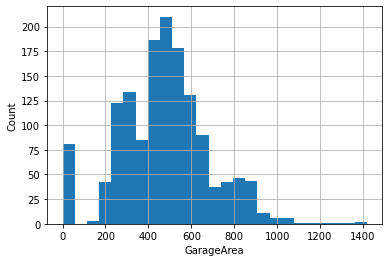

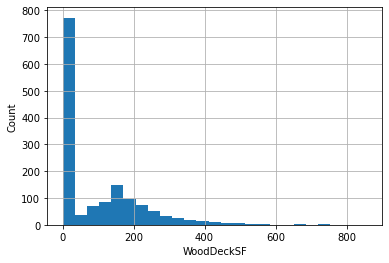

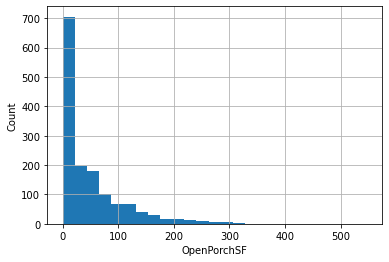

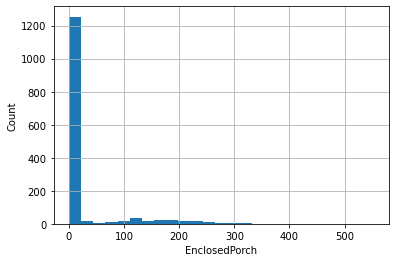

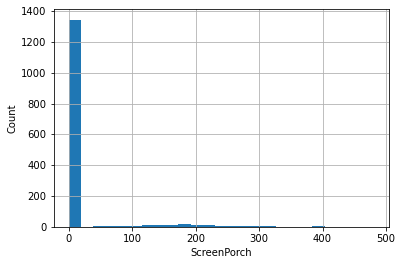

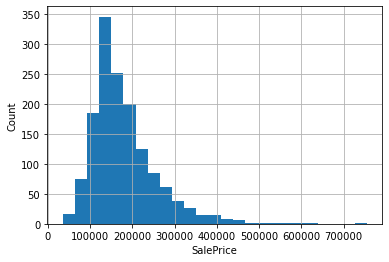

In [15]:
for feature in continuous_feature :
    df[feature].hist(bins=25)
    #sns.displot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

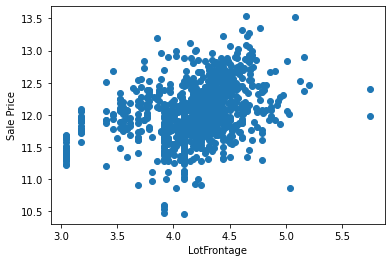

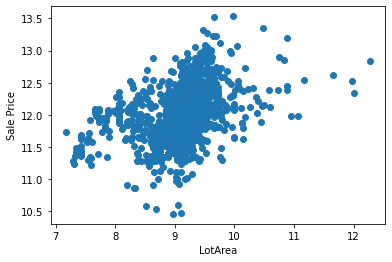

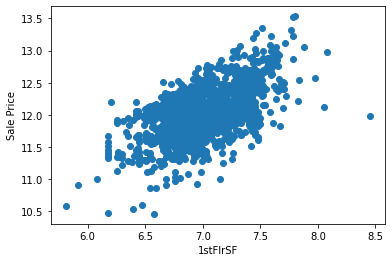

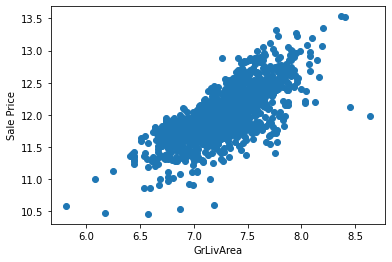

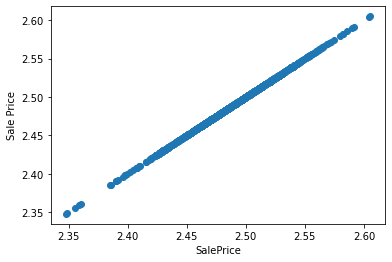

In [31]:
df_copy = df.copy()
df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
for feature in continuous_feature :
    if 0 in df_copy[feature].unique() :
        pass
    else :
        df_copy[feature] = np.log(df_copy[feature])
        #df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
        plt.scatter(df_copy[feature],df_copy['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

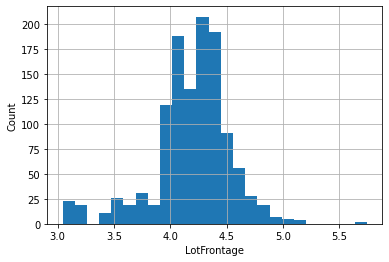

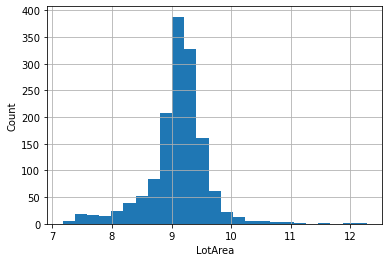

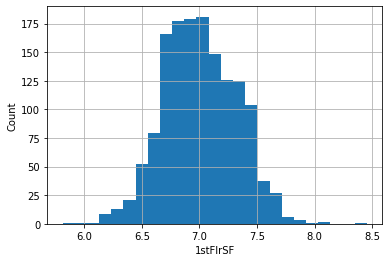

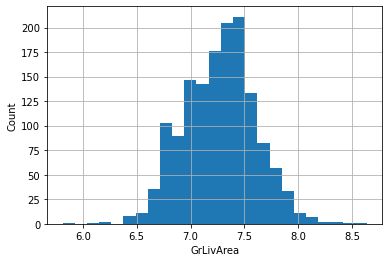

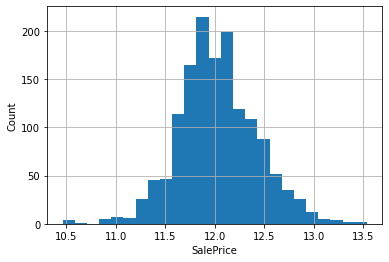

In [29]:
df_copy = df.copy()
#df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
for feature in continuous_feature :
    if 0 in df_copy[feature].unique() : ## log(0) is not defined
        pass
    else :
        df_copy[feature] = np.log(df_copy[feature])
        #df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
        df_copy[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

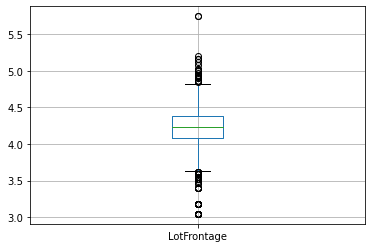

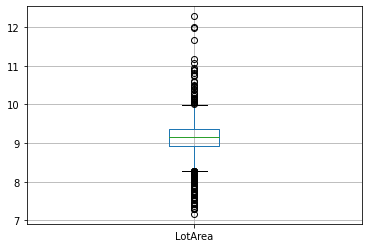

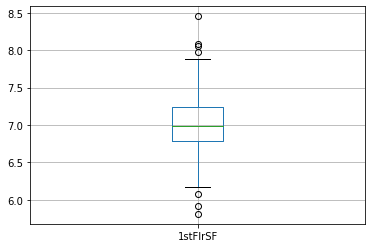

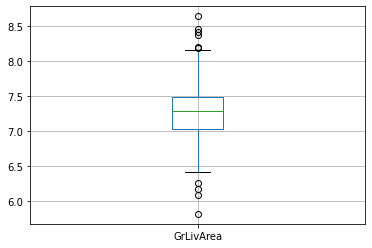

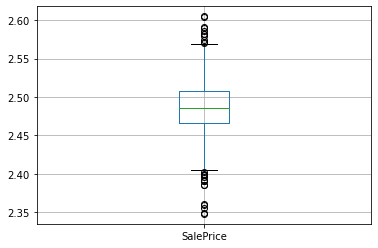

In [27]:
df_copy = df.copy()
df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
for feature in continuous_feature :
    if 0 in df_copy[feature].unique() :
        pass
    else :
        df_copy[feature] = np.log(df_copy[feature])
        #df_copy['SalePrice'] = np.log(df_copy['SalePrice'])
        df_copy.boxplot(column=feature)
        plt.show()

In [32]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [33]:
for feature in categorical_features :
    print("Feature {} has {} category".format(feature,len(df[feature].unique())))

Feature MSZoning has 5 category
Feature Street has 2 category
Feature Alley has 3 category
Feature LotShape has 4 category
Feature LandContour has 4 category
Feature Utilities has 2 category
Feature LotConfig has 5 category
Feature LandSlope has 3 category
Feature Neighborhood has 25 category
Feature Condition1 has 9 category
Feature Condition2 has 8 category
Feature BldgType has 5 category
Feature HouseStyle has 8 category
Feature RoofStyle has 6 category
Feature RoofMatl has 8 category
Feature Exterior1st has 15 category
Feature Exterior2nd has 16 category
Feature MasVnrType has 5 category
Feature ExterQual has 4 category
Feature ExterCond has 5 category
Feature Foundation has 6 category
Feature BsmtQual has 5 category
Feature BsmtCond has 5 category
Feature BsmtExposure has 5 category
Feature BsmtFinType1 has 7 category
Feature BsmtFinType2 has 7 category
Feature Heating has 6 category
Feature HeatingQC has 5 category
Feature CentralAir has 2 category
Feature Electrical has 6 catego

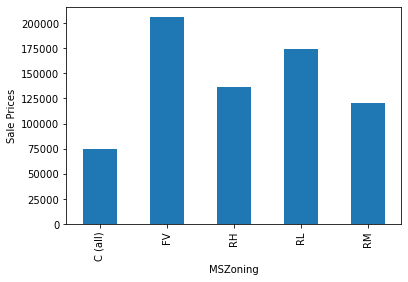

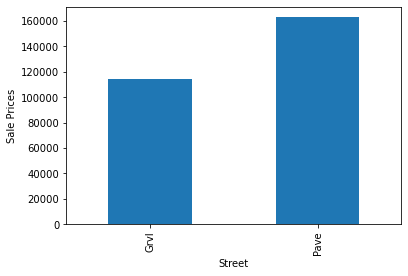

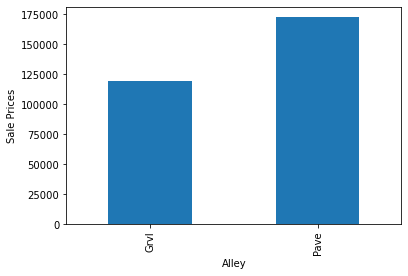

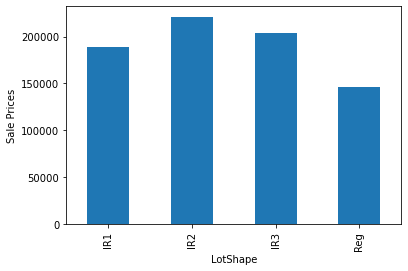

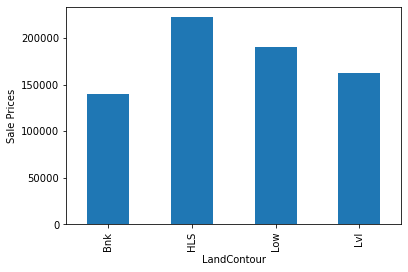

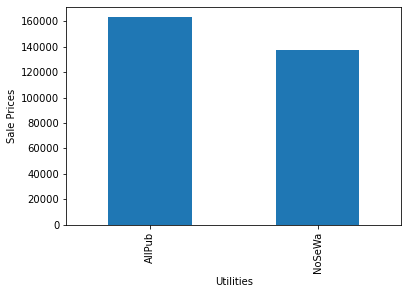

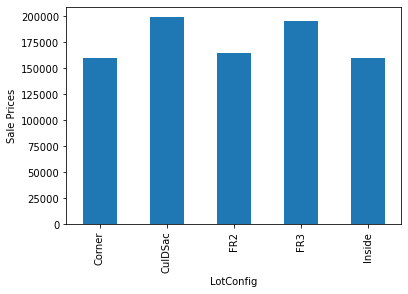

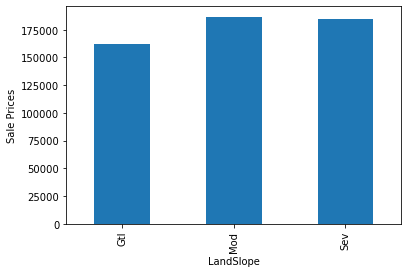

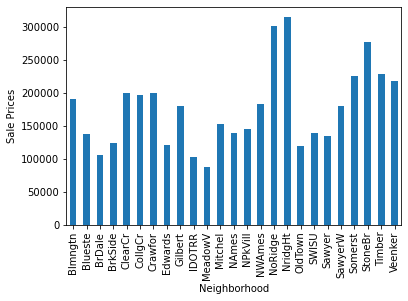

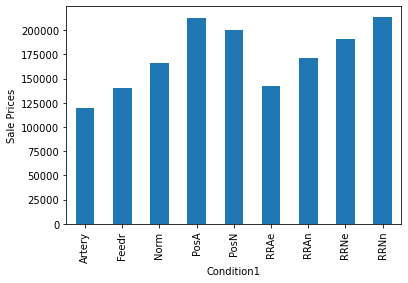

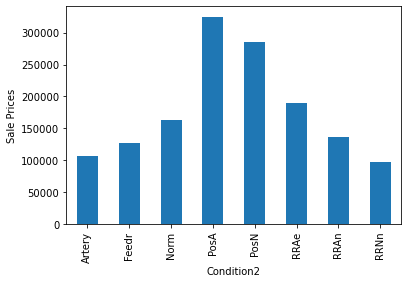

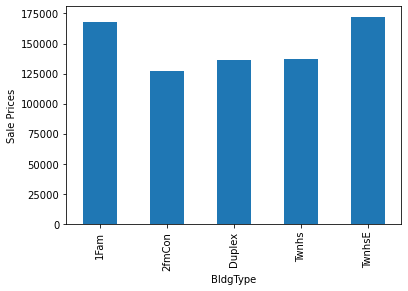

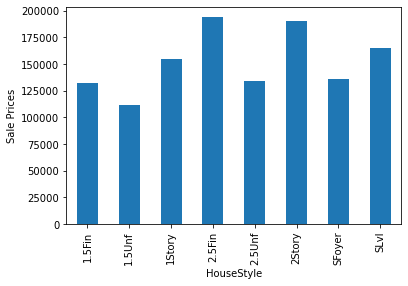

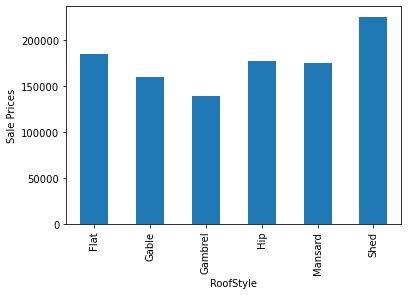

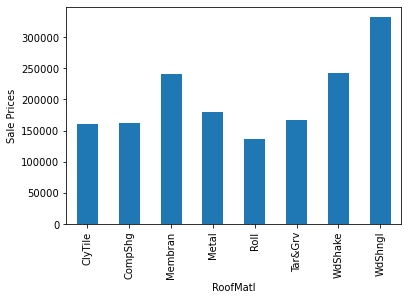

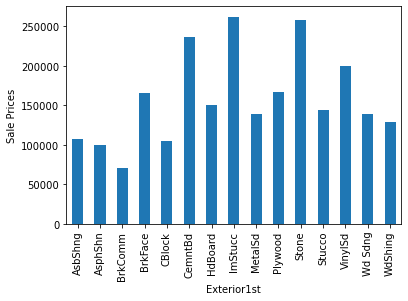

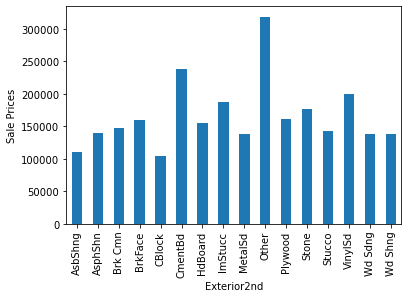

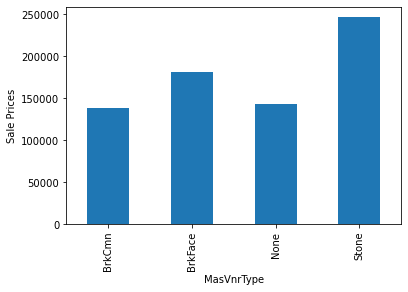

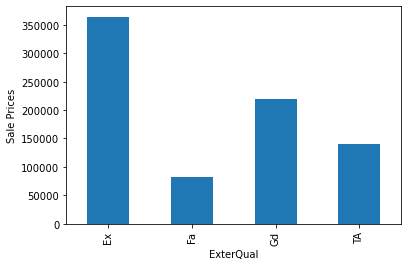

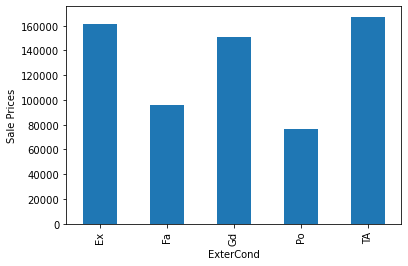

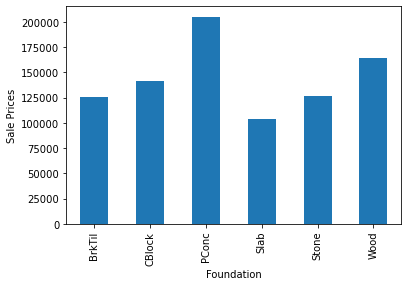

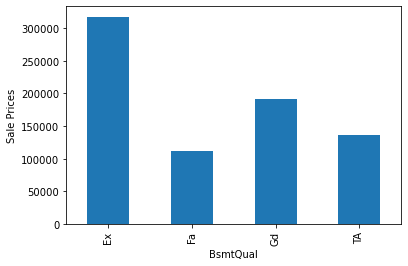

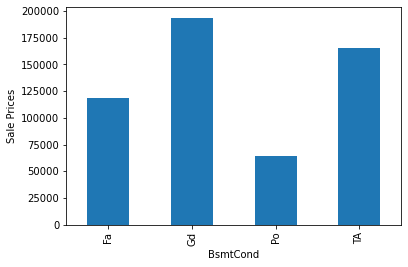

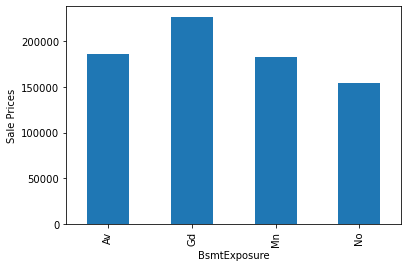

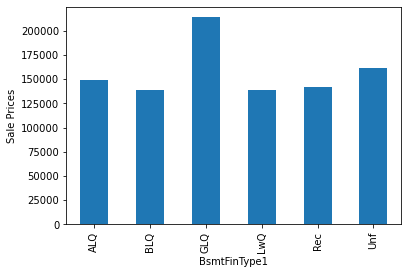

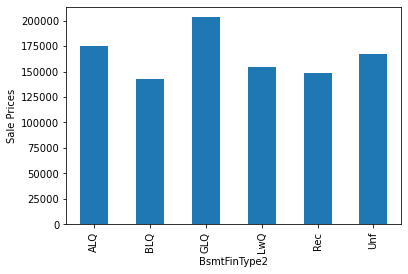

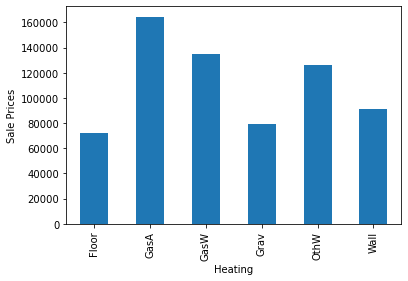

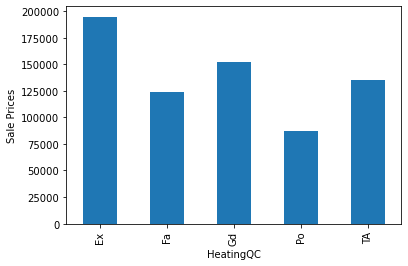

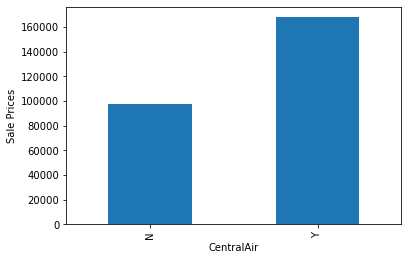

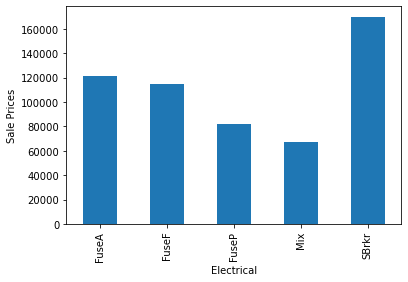

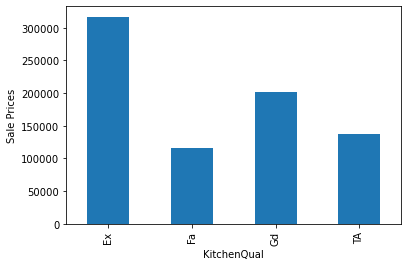

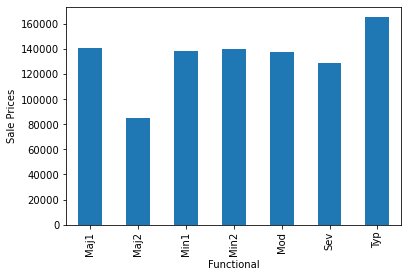

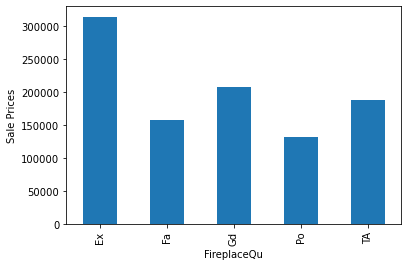

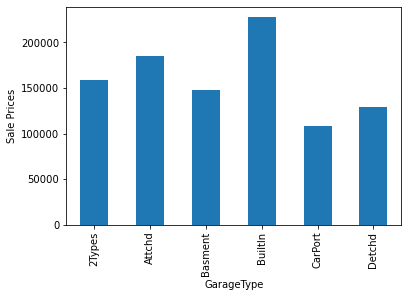

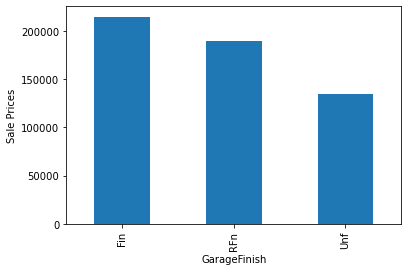

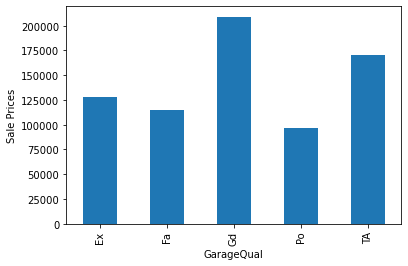

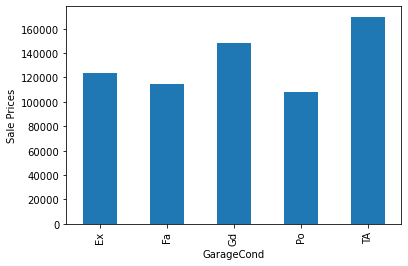

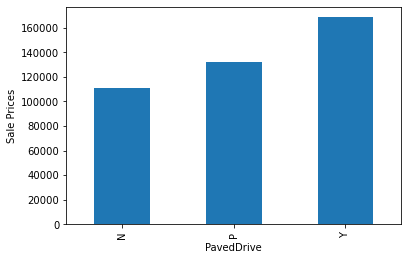

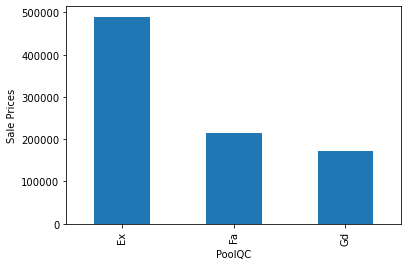

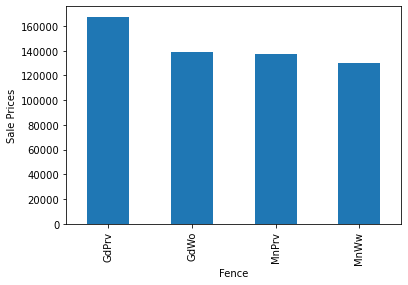

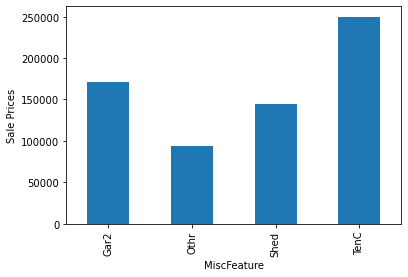

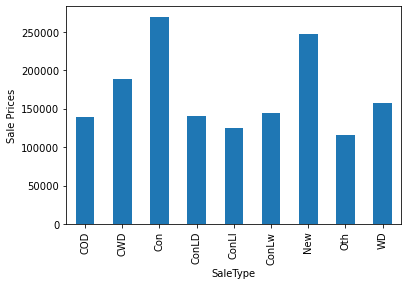

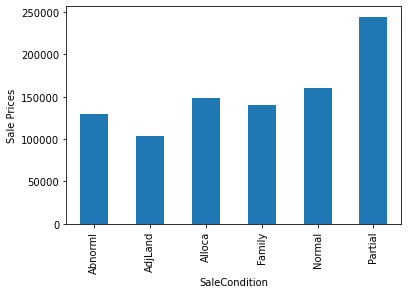

In [40]:
for feature in categorical_features :
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Prices')
    plt.show()